# 在python中使用Matplotlib注解绘制树形图

**Matplotlib 注解**
注解工具：annotations，内嵌支持带箭头的划线工具，可以在其他恰当的地方指向数据位置，并在此处添加描述信息，解释数据内容  
annotations中的参数：  
annotate(s='备注文本',xy=目标位置,xycoords=目标坐标系,xytext=备注位置,textcoords=备注坐标系,fontsize=字体大小,arrowprops=箭头属性)   

s  为注释文本内容   
xy 为被注释的坐标点    
xytext 为注释文字的坐标位置   
xycoords和textcoords是坐标xy与xytext的说明  
xycoords和textcoords 参数如下:  

| 参数 | 坐标系 | 
|------|-------|
| 'figure points' | 距离图形左下角的点数量 | 
| 'figure pixels' | 距离图形左下角的像素数量 | 
| 'figure fraction' | 0,0 是图形左下角，1,1 是右上角 | 
| 'axes points' | 距离轴域左下角的点数量 | 
| 'axes pixels' | 距离轴域左下角的像素数量 | 
| 'axes fraction' | 0,0 是轴域左下角，1,1 是右上角 | 
| 'data' | 使用轴域数据坐标系 |

arrowprops的参数：#箭头参数,参数类型为字典dict


| arrowprops键 | 描述 | 
|------|-------|
| width | 箭头宽度，以点为单位 | 
| frac | 箭头头部所占据的比例 | 
| headwidth | 箭头的底部的宽度，以点为单位 | 
| shrink | 移动提示，并使其离注释点和文本一些距离 | 
| **kwargs | matplotlib.patches.Polygon的任何键，例如facecolor |  

bbox给注解文本增加外框 ，参数类型为字典，常用参数如下：  

| 参数 | 描述 | 
|------|-------|
| boxstyle | 方框外形 | 
| facecolor(简写fc) | 背景颜色 | 
| edgecolor(简写ec) | 边框线条颜色 | 
| edgewidth | 边框线条大小 | 




## 使用文本注解绘制树节点

In [3]:
# 使用文本注解绘制数节点
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# 下面两行代码解决matplot画图中中文的乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
decisionNode = dict(boxstyle='sawtooth',fc='0.8')
leafNode = dict(boxstyle='round4',fc='0.8')
arrow_args = dict(arrowstyle='<-')

#  centerPt节点中心坐标  parentPt 起点坐标
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='data',
                           xytext=centerPt,textcoords='data',
                           va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)
    
def createPlot():
    fig = plt.figure(1,facecolor='white')
    # Clear figure 清空绘图区
    fig.clf()
    # frameon=False隐藏坐标边框
    # create.ax1给函数绑定一个属性，是一个全局变量
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

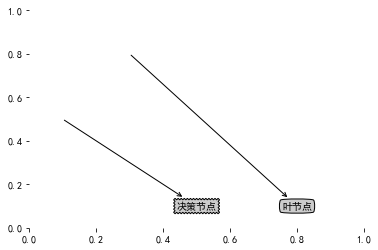

In [4]:
createPlot()

## 构造注解树
必须知道有多少个叶节点，以便正确确定x轴的长度  
必须知道树有多少层，才能正确确定y轴的高度

In [1]:
# 获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    # dict_keys对象,支持iterable 但不支持indexable
    firstStr = list(myTree.keys())[0]
    print('firstStr:',firstStr)
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试节点的数据类型是否为字典
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
    

In [2]:
# retrieveTree输出预先存储的树信息，避免了每次测试代码时都要从数据中创建树的麻烦
def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                  {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [3]:
myTree = retrieveTree(0)
getNumLeafs(myTree)

firstStr: no surfacing
firstStr: flippers


3

In [8]:
getTreeDepth(myTree)

2

In [9]:
# plotTree 函数
def plotMidText(cntrPt,parentPt,txtString):
    # 在cntrPt,parentPt两个坐标中点写一段文本
    xMid = (parentPt[0] + cntrPt[0])/2.0
    yMid = (parentPt[1] + cntrPt[1])/2.0
    #xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    #yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    # 在父子节点填充文本信息
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    # 已画叶节点的x坐标+(1.0+float(numLeafs))*半叶距,cntrPt存储节点中心坐标
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))*(1/2.0)*(1/plotTree.totalW),plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
# createPlot()是主函数·
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    #最左边的叶节点与图的左边界，即x=0的直线，相差一个“半叶距”
    plotTree.xOff = -0.5/plotTree.totalW
    # yOff代表当前处理的决策树的层，最高层时yOff是1，每到达决策树下一层，yOff都要减少一个层距，
    # 例如决策树深度为3，那么层距为1/3
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

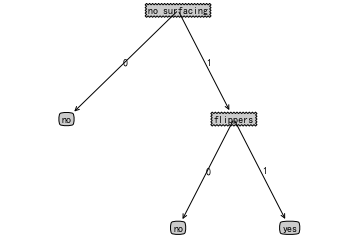

In [10]:
myTree = retrieveTree(0)
createPlot(myTree)

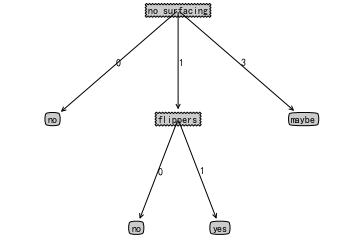

In [11]:
myTree['no surfacing'][3] = 'maybe'
myTree
createPlot(myTree)

## 使用决策树预测隐形眼镜类型

In [12]:
lensesTree = {'tearRate': {'normal': {'atigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

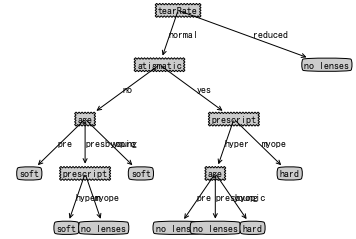

In [13]:
createPlot(lensesTree)

# cookie：

In [31]:
# 函数本身就是对象，给一个对象绑定一个属性如下
def A():
    pass
def B():
    A.a=1
    print(A.a)

In [40]:
def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('no surfacing',(0.5,1),(0.5,1),decisionNode)
    plt.show()

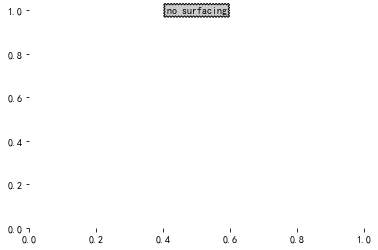

In [41]:
createPlot()